# Worksheet 2: Populations and Sampling

### Lecture and Tutorial Learning Goals
After completing this week's lecture and tutorial work, you will be able to:

1. Compare and contrast quantitative and categorical variables.
2. Explain random and representative sampling and how this can influence estimation.
3. Define random variables and explain how they relate to sampling.
4. Define standard error and explain its purpose.
5. Compare and contrast population distribution, sample distribution and an estimator's sampling distribution.
6. Explain what a sampling distribution is, list its properties, and its purpose in statistical inference.

In [10]:
# Run this cell before continuing.
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
source("tests_worksheet_02.R")

## 1. Warm-Up Questions

Before we get started, let's start with a few warm-up questions.

**Question 1.0**
<br>{points: 1}

True or false?

The distribution of a single sample will **always** have a similar shape to the population distribution.

_Assign your answer to an object called `answer1.0`. Your answer should be either "true" or "false" surrounded by quotes._

In [11]:
# answer1.0 <- ...

# your code here
answer1.0 <- "false"

In [12]:
test_1.0()

[1] "Success!"


**Question 1.1**
<br>{points: 1}

Which of the following variables is **not** an example of a quantitative variable?

A. The number of red Skittles in a given package.

B. The species of a tree.

C. The age of a student in STAT 201.

D. The weight of a newborn puppy.

_Assign your answer to an object called `answer1.1`. Your answer should be a single character surrounded by quotes._

In [13]:
# answer1.1 <- ...

# your code here
answer1.1 <- "B"

In [14]:
test_1.1()

[1] "Success!"


**Question 1.2**
<br>{points: 1}

We quantify the variation of the point estimates in a sampling distribution by using:

A. The variance of the sampling distribution, which is called the standard variance.

B. The variance of the sampling distribution, which is called the standard error.

C. The square root of the variance of the sampling distribution, which is called the standard variance.

D. The standard deviation of the sampling distribution, which is called the standard error.

_Assign your answer to an object called `answer1.2`. Your answer should be a single character surrounded by quotes._

In [15]:
# answer1.2 <- ...

# your code here
answer1.2 <- "D"

In [16]:
test_1.2()

[1] "Success!"


## 2. Random Variables

Since we are going to be working with populations and sampling quite extensively throughout this course, we are now going to introduce the concept of a random variable so we can describe them a bit more formally. First, let's answer a few general questions relating to random variables, and then we will connect them to our understanding of populations and sampling.

**Question 2.0**
<br>{points: 1}

Which of the following examples could **not** be described as a random variable?

A. The number of windows in the Earth Sciences Building (ESB).

B. The number of students in the Earth Sciences Building (ESB) in an hour from now.

C. The result of rolling a 6-sided die.

D. The result of a coin flip.

_Assign your answer to an object called `answer2.0`. Your answer should be a single character surrounded by quotes._

In [17]:
# answer2.0 <- ...

# your code here
answer2.0 <- "A"

In [18]:
test_2.0()

[1] "Success!"


_Use the following information to answer the **next 2 questions**._

Consider the population of cars owned by UBC students and assume there are exactly $3000$ of these cars. Suppose we had access to up-to-date data for the age (in years, rounded down to the nearest integer), horsepower (HP), and the number of doors for each of the $3000$ cars (we have access to data for the entire population). The first few rows of the data frame representing the population might look something like this


| age | horsepower | doors |
|-----|------------|-------|
| 7   | 127        | 4     |
| 9   | 310        | 4     |
| 5   | 140        | 2     |
| 5   | 132        | 2     |
| ... | ...        | ...   |

with $2996$ more rows.

**Question 2.1**
<br>{points: 1}

Convince yourself that the age of a single UBC student's car is a random variable (the distribution of the random variable can be visualized as a histogram of all of the car ages in the population). Call it $X$. Which of the following statements best describes the meaning of the `age` column of the data frame in relation to the random variable $X$?

A. The `age` column is an outcome of $X$.

B. The `age` column is a sample of $3000$ different outcomes of $X$.

C. The `age` column is the collection of all possible outcomes of $X$.

_Assign your answer to an object called `answer2.1`. Your answer should be a single character surrounded by quotes._

In [19]:
# answer2.1 <- ...

# your code here
answer2.1 <- "C"

In [20]:
test_2.1()

[1] "Success!"


**Question 2.2**
<br>{points: 1}

Suppose we choose a single car from the population (the data frame above) using `rep_sample_n(size = 1)` and it has the following characteristics:

| age | horsepower | doors |
|-----|------------|-------|
| 2   | 156        | 2     |

True or false?

The number of doors on this car (2) can be considered an outcome of a random variable.

_Assign your answer to an object called `answer2.2`. Your answer should be either "true" or "false", surrounded by quotes._

In [21]:
# answer2.2 <- ...

# your code here
answer2.2 <- "true"

In [22]:
test_2.2()

[1] "Success!"


**Question 2.3**
<br>{points: 1}

Which of the following variables related to populations and sampling is an example of a random variable?

A. The mean of a population.

B. The mean of a random sample from a population.

C. The number of individuals in a population.

D. The number of individuals in a random sample from a population.

_Assign your answer to an object called `answer2.3`. Your answer should be a single character surrounded by quotes._

In [31]:
# answer2.3 <- ...

# your code here
answer2.3 <- "B"

In [32]:
test_2.3()

[1] "Success!"


**Question 2.4**
<br>{points: 1}

True or false?

Given that an "estimator" is a random variable whose distribution is the sampling distribution for a population paramater, a point estimate is an observation of a random variable.

_Assign your answer to an object called `answer2.4`. Your answer should be a single character surrounded by quotes._

In [33]:
# answer2.4 <- ...

# your code here
answer2.4 <- "true"

In [34]:
test_2.4()

[1] "Success!"


## 3. Influence of Sample Size

In the previous worksheet, you may have noticed that we held the sample size at a relatively constant size throughout our simulations. But what happens to our sampling distributions when we increase or decrease the sample size more drastically (e.g. a sample size of 10 or 100)? Does it matter? How does it affect our sampling distribution(s)? Is there a pattern? These are some questions that we will answer as we progress through the remainder of this worksheet. To do so, we will revisit the real population we worked with in `worksheet_01`.

![](https://media.giphy.com/media/5XRB3Ay93FZw4/giphy.gif)
<div style="text-align: center"><i>Image from <a href="hhttps://giphy.com/gifs/5XRB3Ay93FZw4/links">giphy.com</i></a></div>

As you work through the rest of this worksheet, there are a few important things you should keep in mind. First, you must acknowledge that we don't usually have access to data for the entire population that we are interested in like we have so far. If we did, we could always calculate the population parameter directly. Here, we are taking the opportunity of having access to these entire populations to study sampling distributions. Second, always remember the purpose of learning about sampling distributions. By learning about the properties of sampling distributions, you will be able to understand the inherent variability/error in point estimates. This "error" associated with a point estimate is critical, and in later weeks we will learn how to report it formally.

### Vancouver Property Tax (Revisited)

If you recall from `worksheet_01`, we explored the population distribution, some sample distributions, and the sampling distribution of sample means for the tax assessment value for **multiple-family dwellings in strata housing** in Vancouver using the `tax_2019` dataset from the `taxyvr` R package. As mentioned previously, we're going to revisit and extend our exploration of the sampling distribution of sample means by altering the size of our simulated samples from this dataset.

Let's start by filtering the `tax_2019` dataset for the population that we are interested in again. Since you already did this during the last worksheet, we have done it for you in the code cell below. Recall that we were interested in the `current_land_value` of properties that meet the following criteria:
- **Have a `current_land_value` greater than \$1:**  Some properties are assignment a value of `NA` and these are the properties undergoing big renovations. These values get ammended after the improvement and are reflected in the following year's assessment. The same occurs with homes that are asssessed at $0.
- **Are of `legal_type` `"STRATA"`**
- **Are of `zone_category` `"Multiple Family Dwelling"`** 

_If you need a refresher on the `tax_2019` dataset and where it came from, please look back at `worksheet_01` and re-read the introduction of section 2 there._

In [35]:
# Run this cell before continuing.
multi_family_strata <- 
    tax_2019 %>%  
    filter(!is.na(current_land_value),
           current_land_value > 1,
           legal_type == "STRATA",
           zone_category == "Multiple Family Dwelling") %>% 
    select(current_land_value)
head(multi_family_strata)

current_land_value
<dbl>
1052000
984000
984000
1067000
500000
982000


**Question 3.0** 
<br> {points: 1}

Now let's start taking samples from our population `multi_family_strata`. First, take 2000 random samples of size 10 using the `rep_sample_n` function and a seed of `9869`.

_Assign your data frame to an object called `samples_10`._

In [37]:
set.seed(9869) # DO NOT CHANGE!

# your code here
samples_10 <- multi_family_strata %>% rep_sample_n(size=10, reps=2000)

head(samples_10)

replicate,current_land_value
<int>,<dbl>
1,625000
1,472000
1,491000
1,808000
1,653000
1,1039000


In [38]:
test_3.0()

[1] "Success!"


**Question 3.1** 
<br> {points: 1}

Next, calculate the mean of each sample you took in **question 3.0**; these are our point estimates. Name the new column containing the sample means `sample_mean`.

_Assign your data frame to an object called `sample_means_10`._

In [39]:
# your code here
sample_means_10 <- samples_10 %>% 
                group_by(replicate) %>%
                summarize(sample_mean= mean(current_land_value))
head(sample_means_10)

`summarise()` ungrouping output (override with `.groups` argument)



replicate,sample_mean
<int>,<dbl>
1,578900
2,551000
3,489900
4,632300
5,634000
6,650300


In [40]:
test_3.1()

[1] "Success!"


**Question 3.2**
<br> {points: 1}

Finally, visualize the distribution of the sample means from the previous question by plotting a histogram using `geom_histogram` with the argument `binwidth = 30000`. Add a title of "n = 10" to the plot using `ggtitle` and ensure that the x-axis has a human-readable label.

_Assign your plot to an object called `sampling_dist_10`._

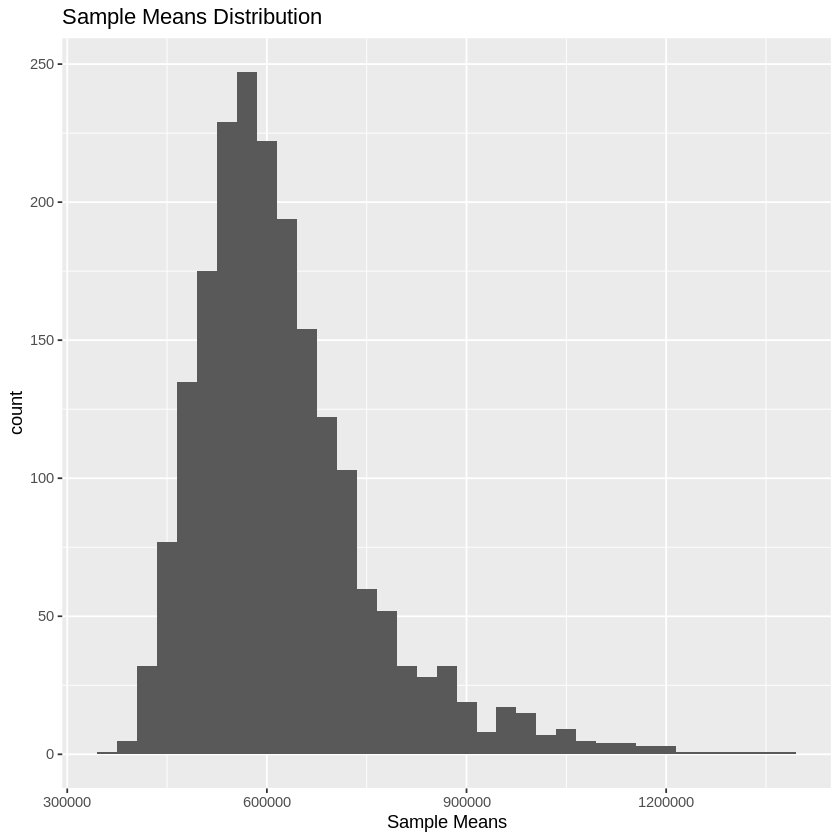

In [41]:
# your code here
sampling_dist_10 <- sample_means_10 %>%
                ggplot(aes(x=sample_mean))+
                ggtitle("Sample Means Distribution") +
                geom_histogram(binwidth=30000)+
                xlab("Sample Means")

sampling_dist_10

In [42]:
test_3.2()

[1] "Success!"


**Question 3.3** 
<br> {points: 1}

Using the same strategy as you did above, draw 2000 random samples of size 30 from `multi_family_strata` using the `rep_sample_n` function, but this time use the seed `7032`. For each sample, calculate the mean as the point estimate. Lastly, visualize the distribution of the sample means (point estimates) you just calculated by plotting a histogram using `geom_histogram` with the argument `binwidth = 25000`. Add a title of "n = 30" to the plot using `ggtitle` and ensure that the x-axis has a human-readable label.

_Assign your plot to an object called `sampling_dist_30`._

`summarise()` ungrouping output (override with `.groups` argument)



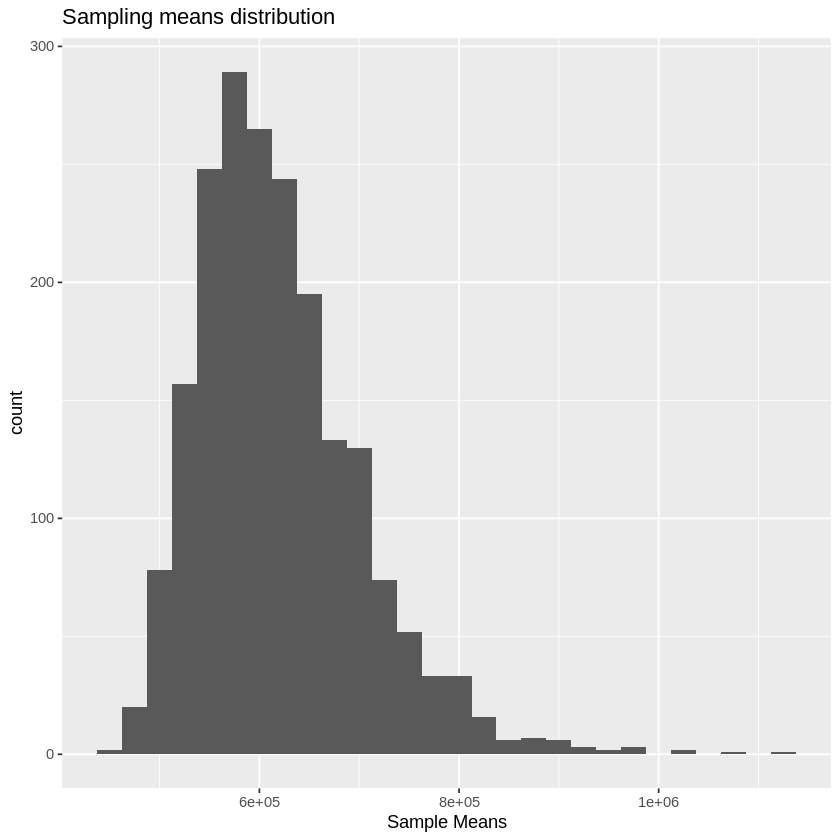

In [48]:
set.seed(7032) # DO NOT CHANGE!

# your code here
sampling_dist_30 <- multi_family_strata %>% 
                rep_sample_n(size=30, reps=2000) %>%
                group_by(replicate) %>%
                summarize(sample_mean=mean(current_land_value)) %>%
                ggplot(aes(x=sample_mean))+
                geom_histogram(binwidth=25000)+
                ggtitle("Sampling means distribution") +
                labs(x="Sample Means")

sampling_dist_30

In [49]:
test_3.3()

[1] "Success!"


**Question 3.4** 
<br> {points: 1}

Again, using the same strategy as you did above, draw 2000 random samples of size 100 using the `rep_sample_n` function. Use the seed `8408`. For each sample, calculate the mean as the point estimate. Lastly, visualize the distribution of the sample means (point estimates) you just calculated by plotting a histogram using `geom_histogram` with the argument `binwidth = 14000`. Add a title of "n = 100" to the plot using `ggtitle` and ensure that the x-axis has a human-readable label.

_Assign your plot to an object called `sampling_dist_100`._

`summarise()` ungrouping output (override with `.groups` argument)



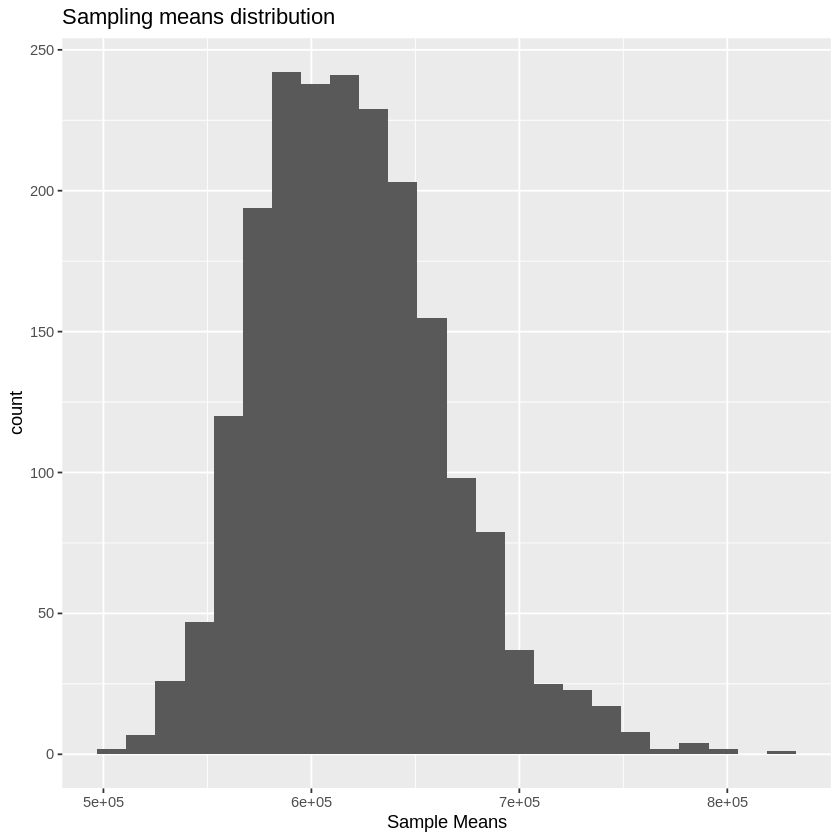

In [52]:
set.seed(8408) # DO NOT CHANGE!

# your code here
sampling_dist_100 <-multi_family_strata %>% 
                rep_sample_n(size=100, reps=2000) %>%
                group_by(replicate) %>%
                summarize(sample_mean=mean(current_land_value)) %>%
                ggplot(aes(x=sample_mean))+
                geom_histogram(binwidth=14000)+
                ggtitle("Sampling means distribution") +
                labs(x="Sample Means")


sampling_dist_100

In [53]:
test_3.4()

[1] "Success!"


In the code cell below, we have used `plot_grid` to plot the three sampling distributions side-by-side. We have sorted the plots by increasing order of sample size from left to right. **Note**: a small number of the sample means are not visible because we manually set bounds on the x-axis so you can compare the distributions more easily (this causes the warnings you observe below).

_Use the set of plots below to answer the **next question**. Some of the code may be confusing, but you do not need to understand the code to answer the question._

Warning message:
“Removed 12 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


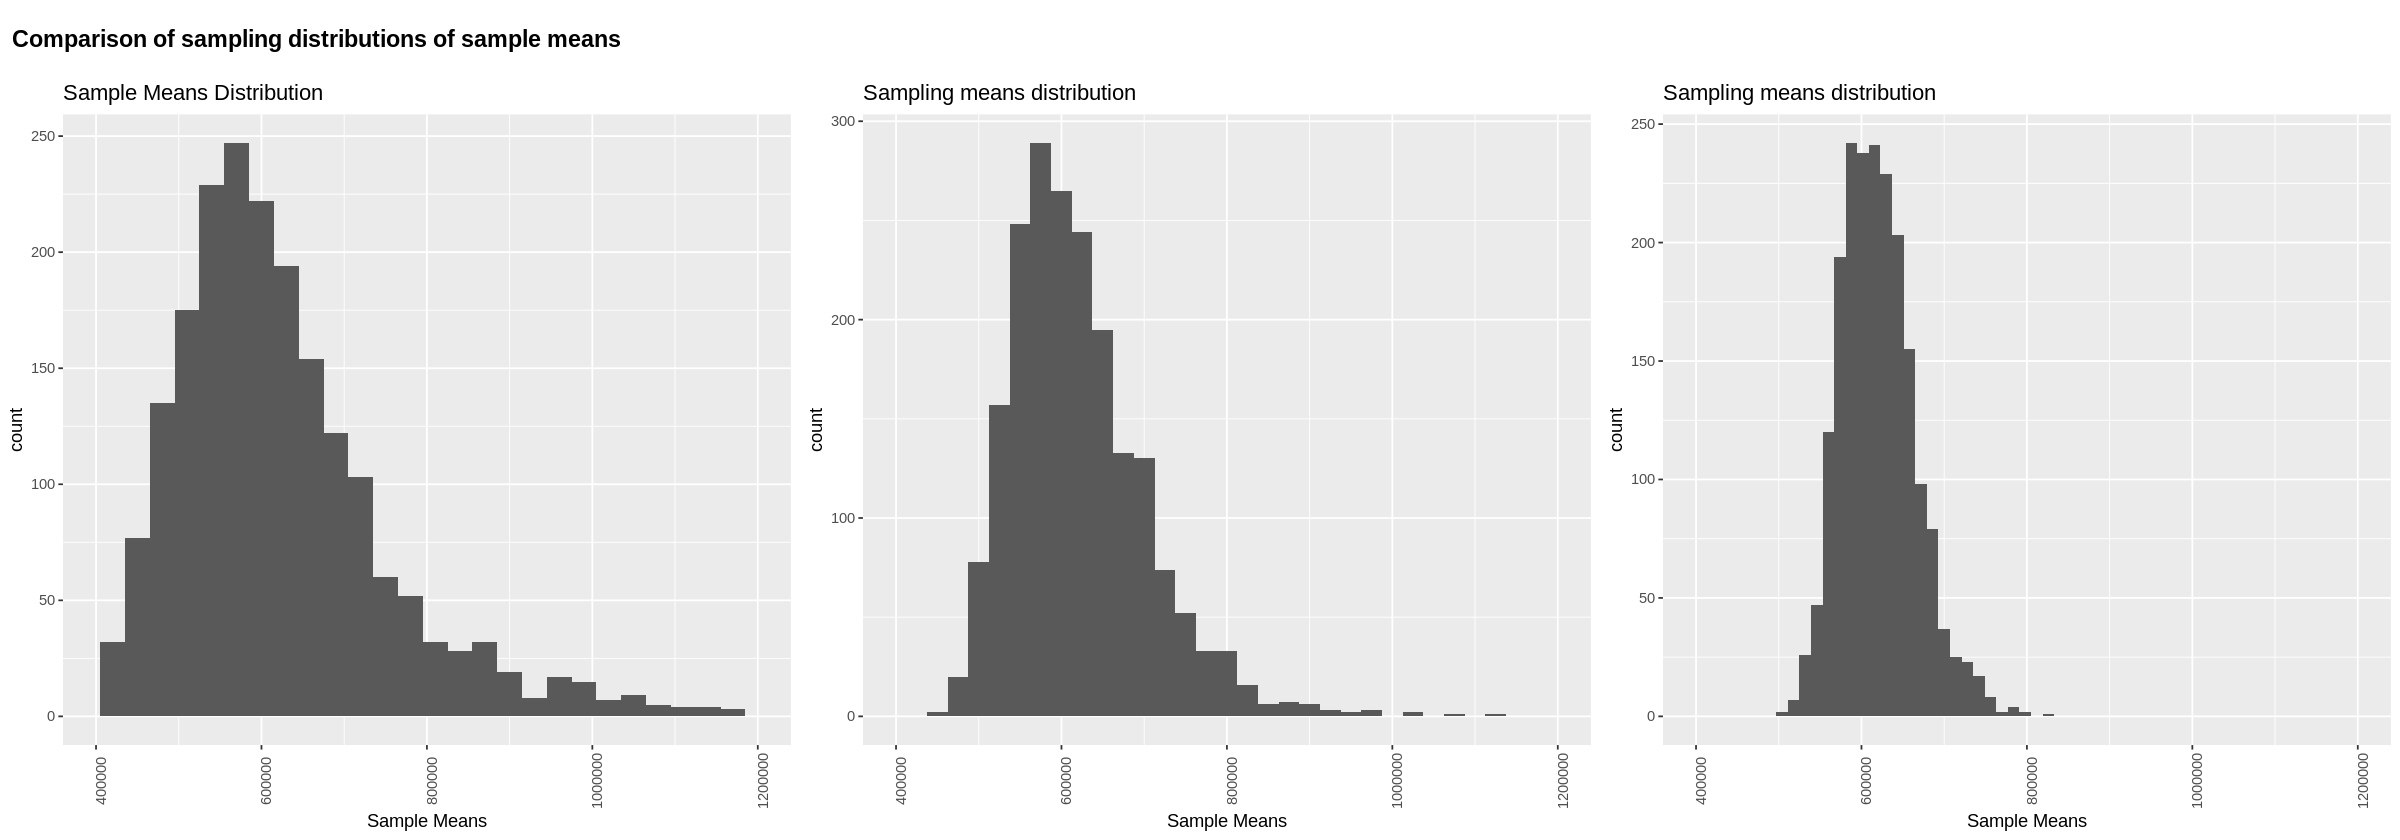

In [54]:
# Run this cell before continuing.
options(repr.plot.width = 20) # temp

mean_plot_row <- plot_grid(sampling_dist_10 +
                theme(axis.text.x = element_text(angle = 90)) +
                scale_x_continuous(breaks = seq(400000, 1200000, 200000),
                                   limits = c(400000, 1200000)),
            sampling_dist_30 +
                theme(axis.text.x = element_text(angle = 90)) +
                scale_x_continuous(breaks = seq(400000, 1200000, 200000),
                                   limits = c(400000, 1200000)),
            sampling_dist_100 +
                theme(axis.text.x = element_text(angle = 90)) +
                scale_x_continuous(breaks = seq(400000, 1200000, 200000),
                                   limits = c(400000, 1200000)),
            ncol = 3)
title <- ggdraw() + 
  draw_label("Comparison of sampling distributions of sample means",
             fontface = 'bold',
             x = 0,
             hjust = 0) +
  theme(plot.margin = margin(0, 0, 0, 7))

means_grid <- plot_grid(title,
                        mean_plot_row,
                        ncol = 1,
                        rel_heights = c(0.1, 1))

means_grid

**Question 3.5**
<br> {points: 1}

Considering the set of plots above, which statement below **is not** correct:

A. As the sample size increases, the sampling distribution becomes narrower.

B. As the sample size increases, there are more sample point estimates closer to the true population mean.

C. As the sample size increases, the sampling distribution appears more bell-shaped.

D. As the sample size increases, the standard error of the estimator increases.

_Assign your answer to an object called `answer3.5`. Your answer should be a single character surrounded by quotes._

In [55]:
# your code here
answer3.5 <- "D"

In [56]:
test_3.5()

[1] "Success!"


**Question 3.6**
<br> {points: 1}

Given what you observed above, and considering the real life scenario where you only have the resources to take one sample, answer the true or false question below: 

True or false?

The smaller your random sample, the better your point estimate reflects the true population quantity you are trying to estimate. 

_Assign your answer to an object called `answer3.6`. Your answer should be either "true" or "false", surrounded by quotes._

In [57]:
# answer3.6 <- ...

# your code here
answer3.6 <- "false"

In [58]:
test_3.6()

[1] "Success!"


## 4. Proportions

Previously we have only been interested in the population parameters of mean, median, and variance. However, these parameters can only describe numerical data; what about categorical data? For this type of data, we often refer to **proportions**. Recall that proportion is the ratio of the number of individuals in the population with a given attribute to the size of the entire population. For example, if there are $n$ individuals in our population and there are $x$ individuals amongst the population with a given attribute of interest, then the proportion, $p$, of the individuals of interest is 

$$p = \frac{x}{n}$$

Just like with the other parameters we have explored, we can also estimate the proportion of a population by taking a sample and calculating a point estimate. Thus, we can also have a sampling distribution of sample proportions. But how does this sampling distribution look? Does it have the same properties as the others we have explored? Is it affected by the sample size in the same way? Let's find out.


Before we continue, here are a couple questions to reinforce your knowledge of the concept of proportion.

**Question 4.0**
<br>{points: 1}

Consider the population of students enrolled at UBC's Vancouver campus. As of the start of the 2019 Winter term, there were 57250 students in total, and among them, 10294 were Faculty of Science students ([source](https://bog3.sites.olt.ubc.ca/files/2020/01/4_2020.02_Enrolment-Annual-Report.pdf)). What is the proportion of Science students at UBC?

_Assign your answer to an object called `answer4.0`. Your answer should be a single number._

In [59]:
# answer4.0 <- ...

# your code here
answer4.0 <- 10294/57250
answer4.0

[1] 0.1798079

In [60]:
test_4.0()

[1] "Success!"


**Question 4.1**
<br>{points: 1}

You are told that 168 students in your BIOL 200 section have taken, or are currently taking, one or more CPSC or STAT courses, which is 60% of the students in the section. How many students are there in total in your BIOL 200 section?

_Assign your answer to an object called `answer4.1`. Your answer should be a single number._

In [61]:
# answer4.1 <- ...

# your code here
answer4.1 <- (100/60)*168
answer4.1

[1] 280

In [62]:
test_4.1()

[1] "Success!"


### Proportions of Vancouver Property Tax 

To learn more about proportions and the sampling distribution of sample proportions, we are again going to revisit the `tax_2019` dataset from the `taxyvr` R package. However, this time we'll be looking at a different variable for **all** properties in Vancouver: `geo_local_area`, which describes the local area where the property can be found (such as Kitsilano, Downtown, or Oakridge). Specifically, we will be looking at the **proportion of properties in Vancouver located downtown** (have a `geo_local_area` of `"Downtown"`), which we can call our population parameter of interest.

Just as before, don't forget about where we are in the grand scheme of things. Let's remind ourselves of the two things we should be keeping in mind as we work through this section:

> First, you must acknowledge that we don't usually have access to data for the entire population that we are interested in like we have so far. If we did, we could always calculate the population parameter directly. Here, we are taking the opportunity of having access to these entire populations to study sampling distributions. Second, always remember the purpose of learning about sampling distributions. By learning about the properties of sampling distributions, you will be able to understand the inherent variability/error in point estimates. This "error" associated with a point estimate is critical, and in later weeks we will learn how to report it formally.

**Question 4.2**
<br>{points: 1}

True or false?

The `geo_local_area` variable in the `tax_2019` dataset is an example of a categorical variable.

_Assign your answer to an object called `answer4.2`. Your answer should be either "true" or "false", surrounded by quotes._

In [67]:
# answer4.2 <- ...

# your code here
answer4.2 <- "true"

In [68]:
test_4.2()

[1] "Success!"


**Question 4.3**
<br>{points: 1}

From the `tax_2019` dataset, filter out the rows that contain an `NA` in the `geo_local_area` column and select only this column.

_Assign your data frame to an object called `geo_pop`._

In [76]:
# your code here
geo_pop <- tax_2019 %>% 
            filter(!is.na(geo_local_area)) %>%
            select(geo_local_area)
head(geo_pop)

geo_local_area
<chr>
West Point Grey
West Point Grey
West Point Grey
West Point Grey
West Point Grey
West Point Grey


In [77]:
test_4.3()

[1] "Success!"


**Question 4.4**
<br>{points: 1}

Calculate the proportion of properties in our population `geo_pop` that are `"Downtown"`; this is the population parameter of interest. Recall that we are going to be exploring the effect of sampling size on the distributions of the point estimates for this parameter.

_Assign your answer to an object called `p`. Your answer should be a single number._

In [82]:
# your code here
temp <- geo_pop %>% 
        filter(geo_local_area=="Downtown")
#temp
p <- nrow(temp)/nrow(geo_pop)
p

[1] 0.1950019

In [83]:
test_4.4()

[1] "Success!"


**Question 4.5**
<br>{points: 1}

Let's take our first set of samples from our population `geo_pop`. First, take 2000 random samples of a size 10 using the `rep_sample_n` function and a seed of `2410`.

_Assign your data frame to an object called `samples_10`._

In [84]:
set.seed(2410) # DO NOT CHANGE!

# your code here
samples_10 <- geo_pop %>% 
            rep_sample_n(size=10, reps=2000)

head(samples_10)

replicate,geo_local_area
<int>,<chr>
1,Victoria-Fraserview
1,Mount Pleasant
1,Killarney
1,South Cambie
1,Sunset
1,Fairview


In [85]:
test_4.5()

[1] "Success!"


**Question 4.6**
<br>{points: 1}

Next, calculate the proportion of each sample you took in the previous question. Name the new column containing the sample proportions `sample_proportion`.

_Assign your data frame to an object called `sample_proportions_10`._

In [90]:
# your code here
sample_proportions_10 <- samples_10 %>%
                    group_by(replicate) %>%
                    summarize(sample_proportion = sum(geo_local_area=="Downtown")/10)

head(sample_proportions_10)

`summarise()` ungrouping output (override with `.groups` argument)



replicate,sample_proportion
<int>,<dbl>
1,0.0
2,0.2
3,0.1
4,0.1
5,0.2
6,0.4


In [91]:
test_4.6()

[1] "Success!"


**Question 4.7**
<br>{points: 1}

Finally, visualize the distribution of the sample proportions from the previous question by plotting a histogram using `geom_histogram` with the argument `binwidth = 1/10`. Add a title of "n = 10" to the plot using `ggtitle` and ensure that the x-axis has a human-readable label.

_Assign your plot to an object called `sampling_dist_10`._

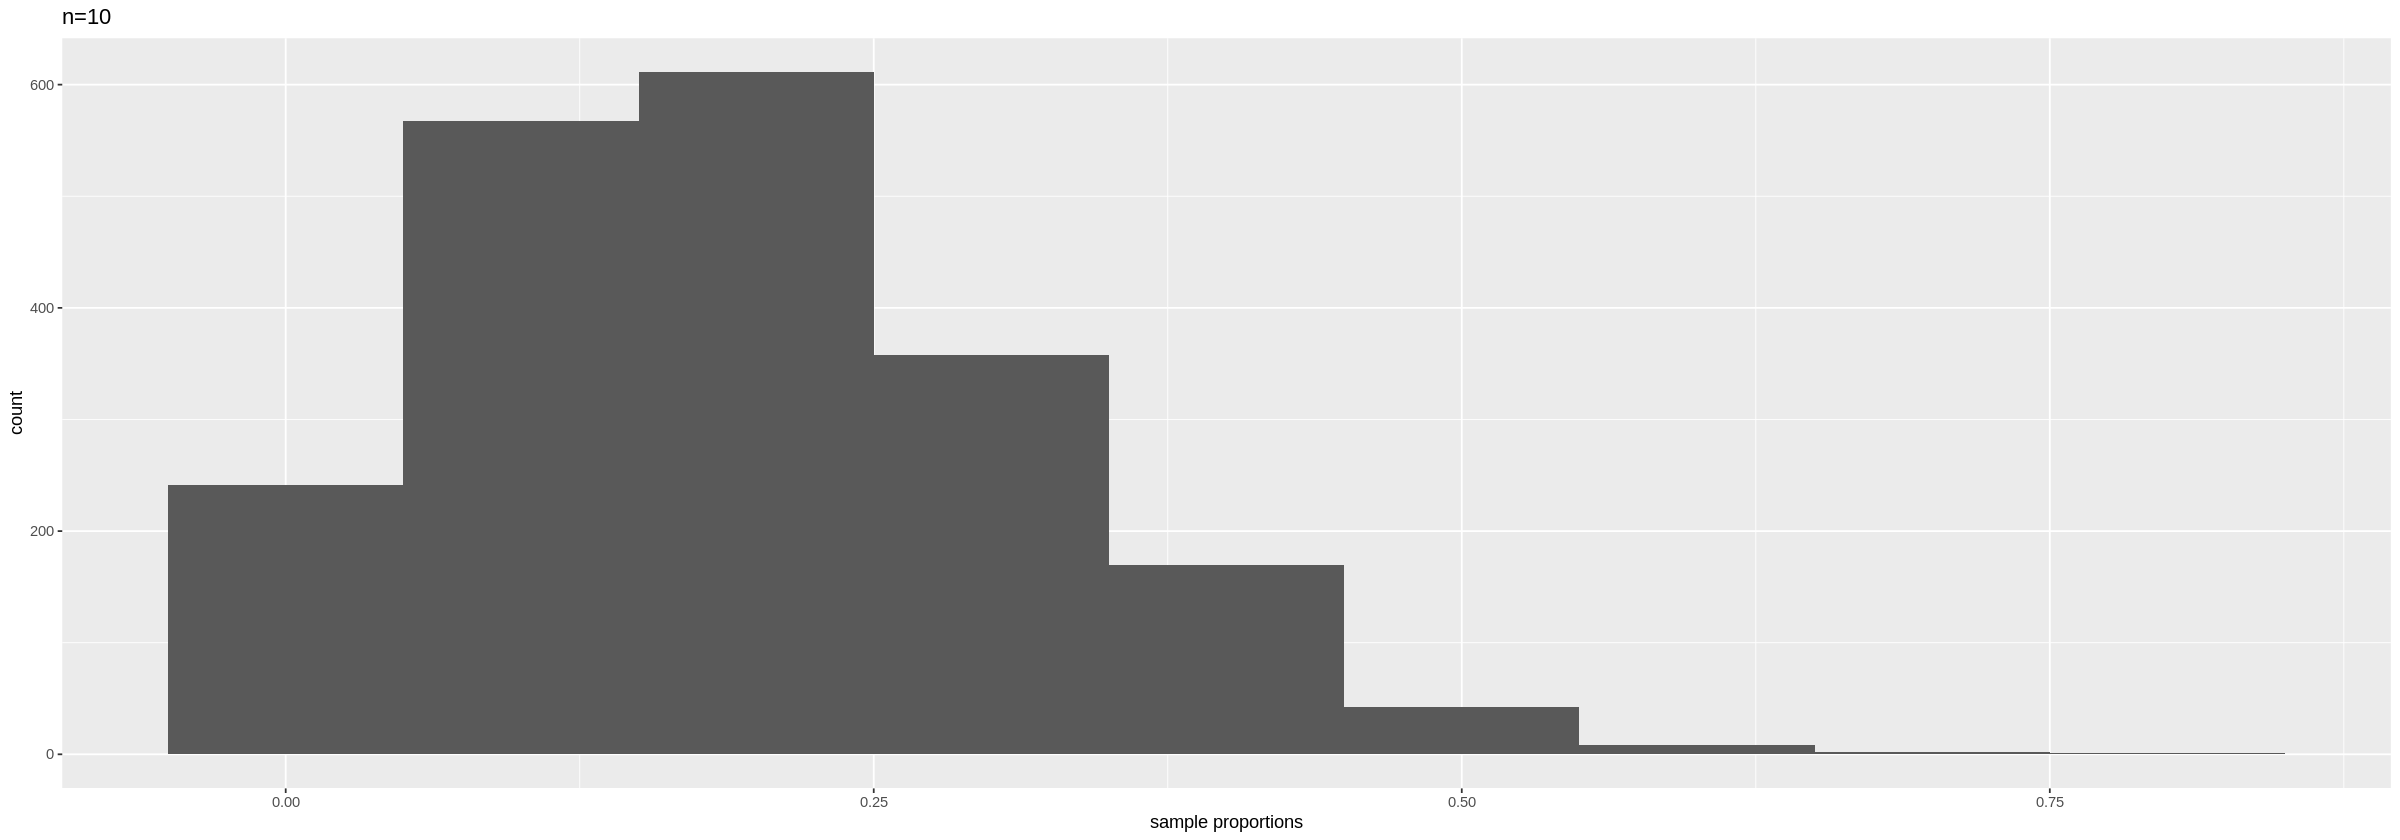

In [94]:
# your code here
sampling_dist_10 <- sample_proportions_10 %>% 
                ggplot(aes(x=sample_proportion)) +
                geom_histogram(binwidth=0.1)+
                ggtitle("n=10") +
                xlab("sample proportions")
sampling_dist_10

In [95]:
test_4.7()

[1] "Success!"


**Question 4.8** 
<br> {points: 1}

Using the same strategy as you did above, draw 2000 random samples of size 30 from the population `geo_pop` using the `rep_sample_n` function, but this time use the seed `6977`. For each sample, calculate the proportion as the point estimate. Lastly, visualize the distribution of the sample proportions (point estimates) you just calculated by plotting a histogram using `geom_histogram` with the argument `binwidth = 1/30`. Add a title of "n = 30" to the plot using `ggtitle` and ensure that the x-axis has a human-readable label.

_Assign your plot to an object called `sampling_dist_30`._

`summarise()` ungrouping output (override with `.groups` argument)



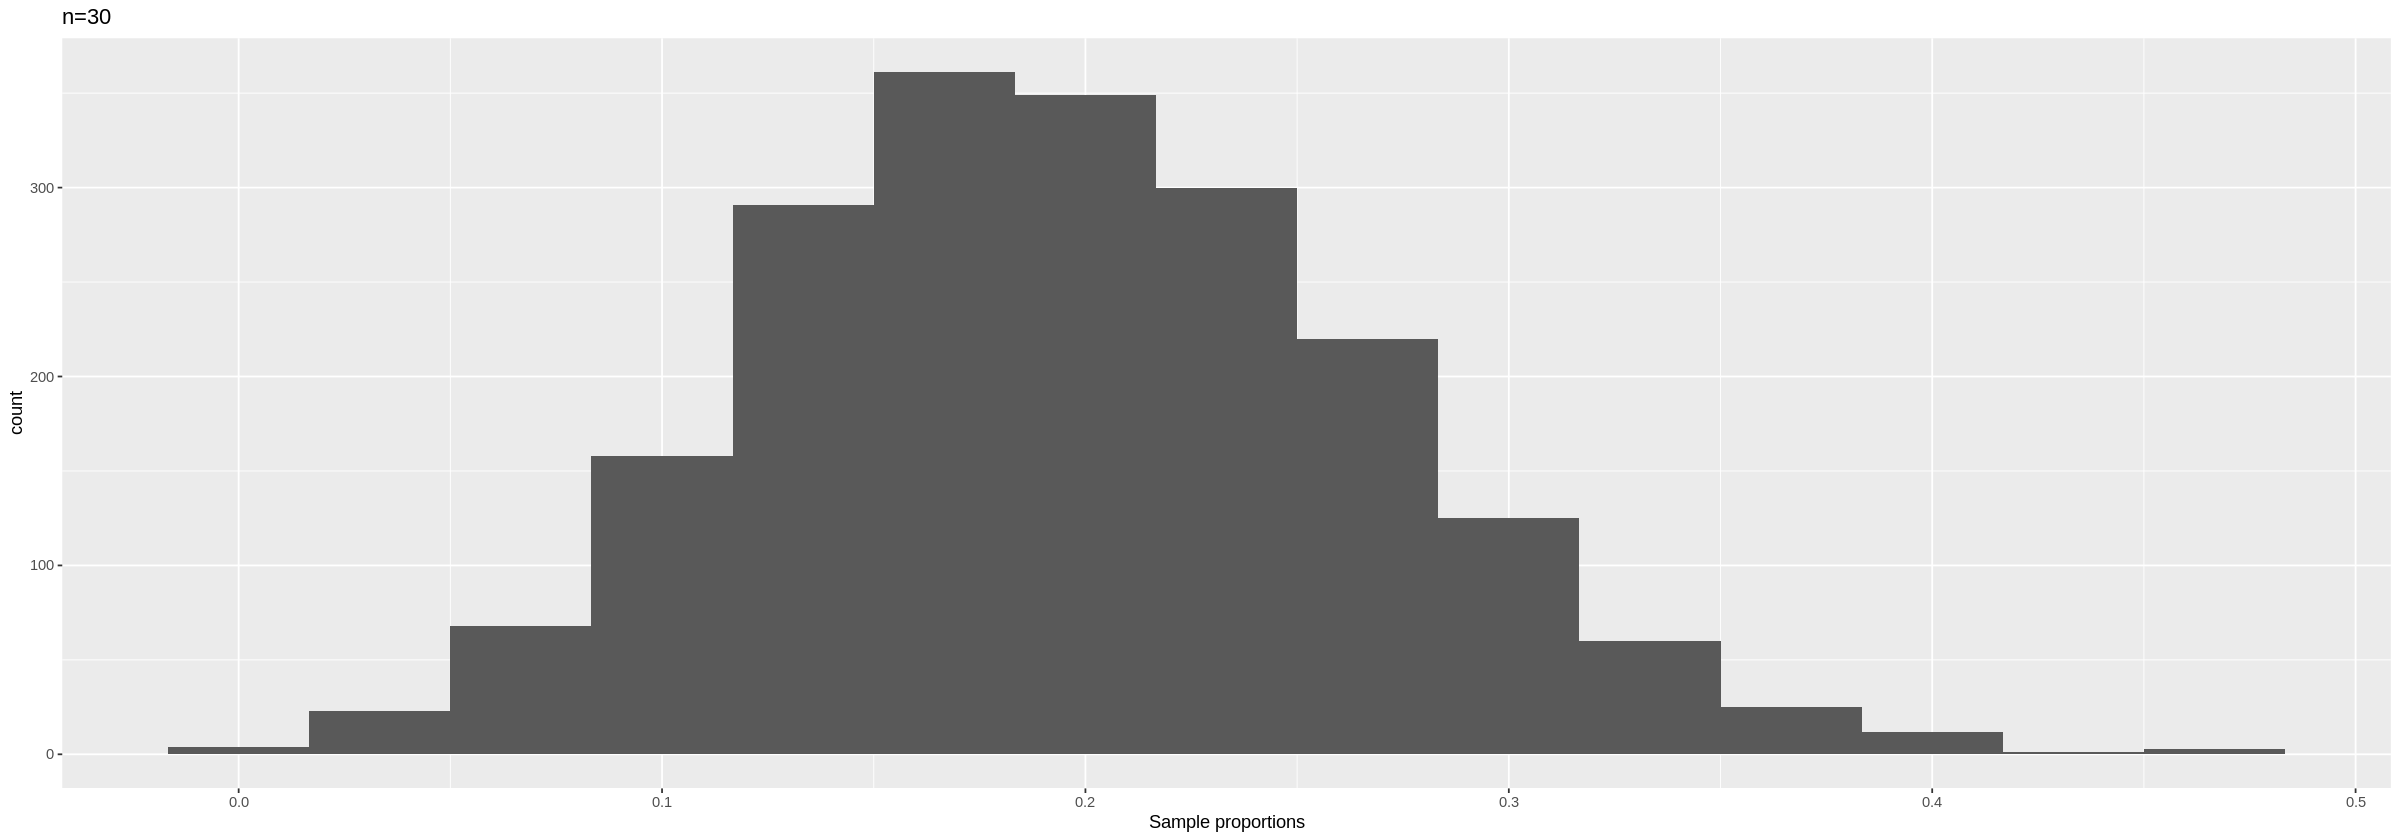

In [107]:
set.seed(6977) # DO NOT CHANGE!

# your code here
sampling_dist_30 <- geo_pop %>%
                rep_sample_n(size=30, reps=2000) %>%
                group_by(replicate) %>%
                summarize(sample_proportion = sum(geo_local_area =="Downtown")/30) %>%
                ggplot(aes(x=sample_proportion))+
                geom_histogram(binwidth= 1/30)+
                ggtitle("n=30")+
                labs(x="Sample proportions")
sampling_dist_30

In [108]:
test_4.8()

[1] "Success!"


**Question 4.9** 
<br> {points: 1}

Using the same strategy as you did above, draw 2000 random samples of size 100 from the population `geo_pop` using the `rep_sample_n` function, but this time use the seed `5231`. For each sample, calculate the proportion as the point estimate. Lastly, visualize the distribution of the sample proportions (point estimates) you just calculated by plotting a histogram using `geom_histogram` with the argument `binwidth = 1/100`. Add a title of "n = 125" to the plot using `ggtitle` and ensure that the x-axis has a human-readable label.

_Assign your plot to an object called `sampling_dist_100`._

`summarise()` ungrouping output (override with `.groups` argument)



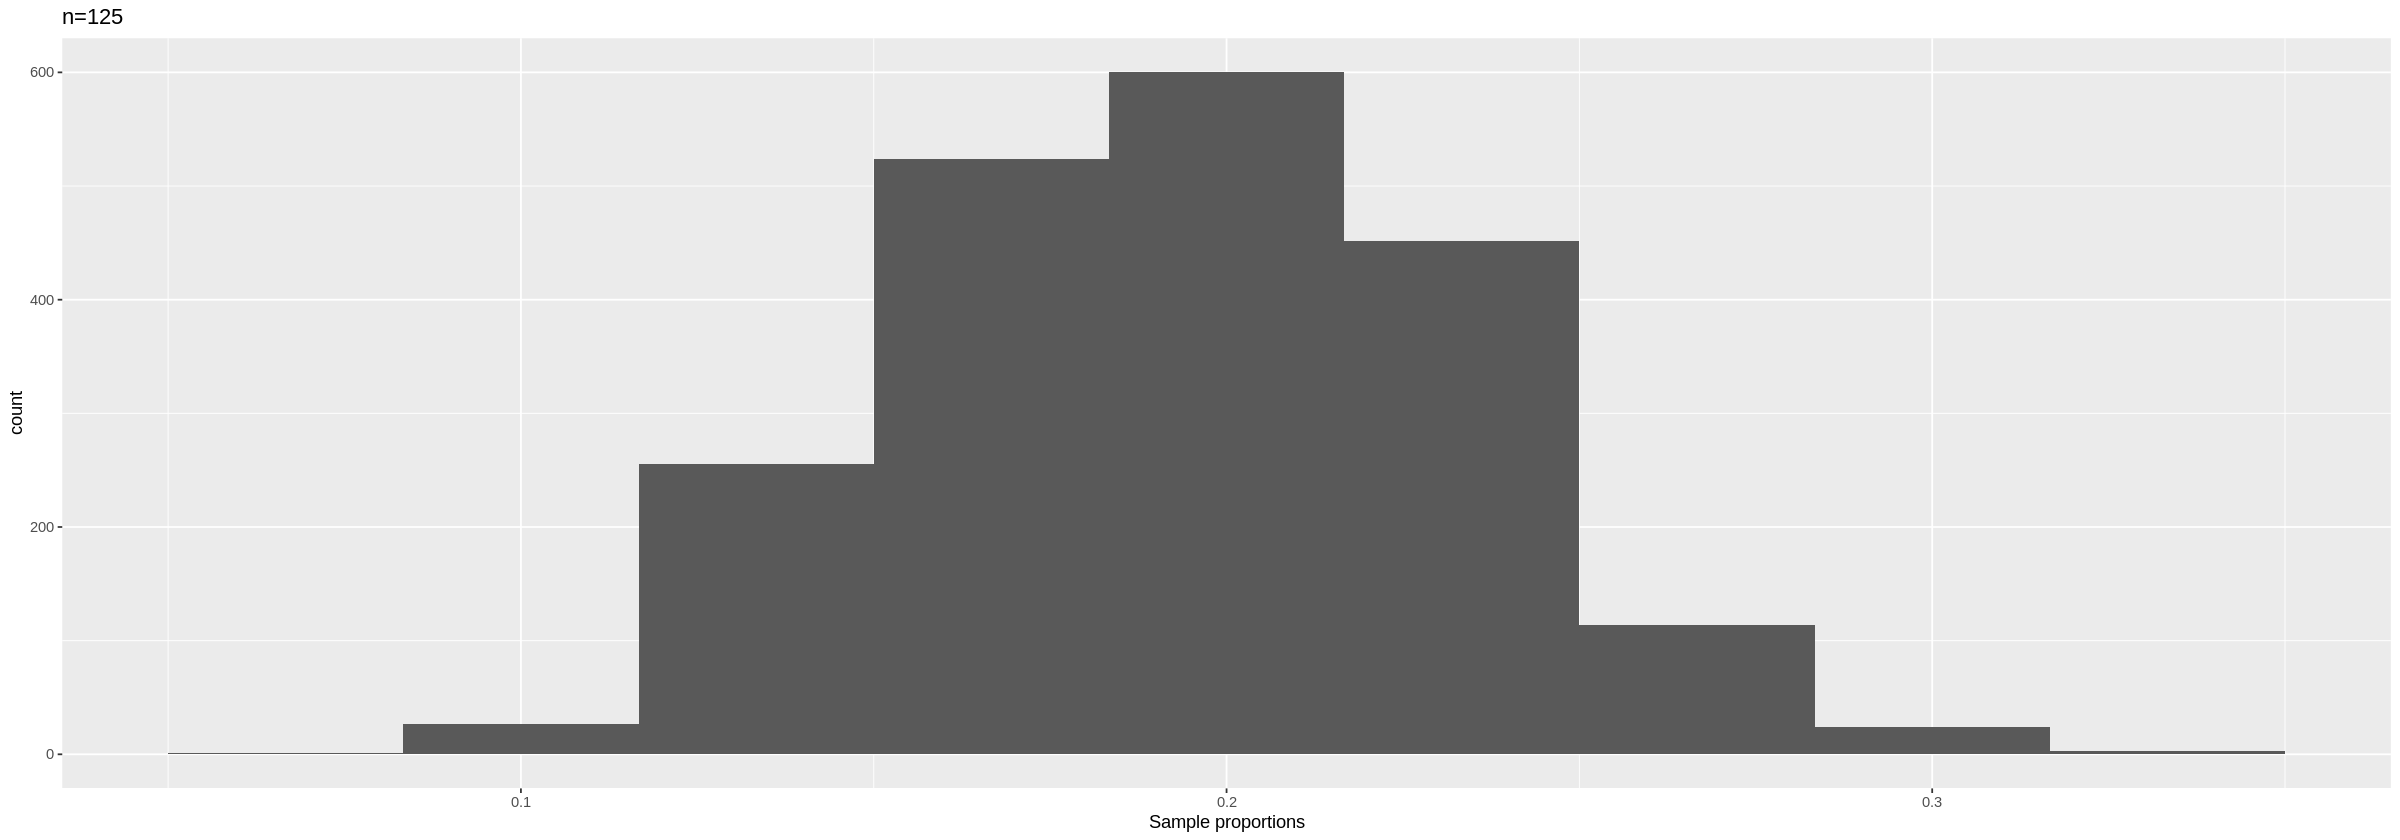

In [109]:
set.seed(5231) # DO NOT CHANGE!

# your code here
sampling_dist_100 <- geo_pop %>%
                rep_sample_n(size=100, reps=2000) %>%
                group_by(replicate) %>%
                summarize(sample_proportion = sum(geo_local_area =="Downtown")/100) %>%
                ggplot(aes(x=sample_proportion))+
                geom_histogram(binwidth= 1/30)+
                ggtitle("n=125")+
                labs(x="Sample proportions")

sampling_dist_100

In [110]:
test_4.9()

[1] "Success!"


In the code cell below, we have used `plot_grid` to plot the three sampling distributions side-by-side. We have sorted the plots by increasing order of sample size from left to right. 

_Use the set of plots below to answer the **next 2 questions**. Some of the code may be confusing, but you do not need to understand the code to answer the questions._

Warning message:
“Removed 1 rows containing missing values (geom_bar).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”


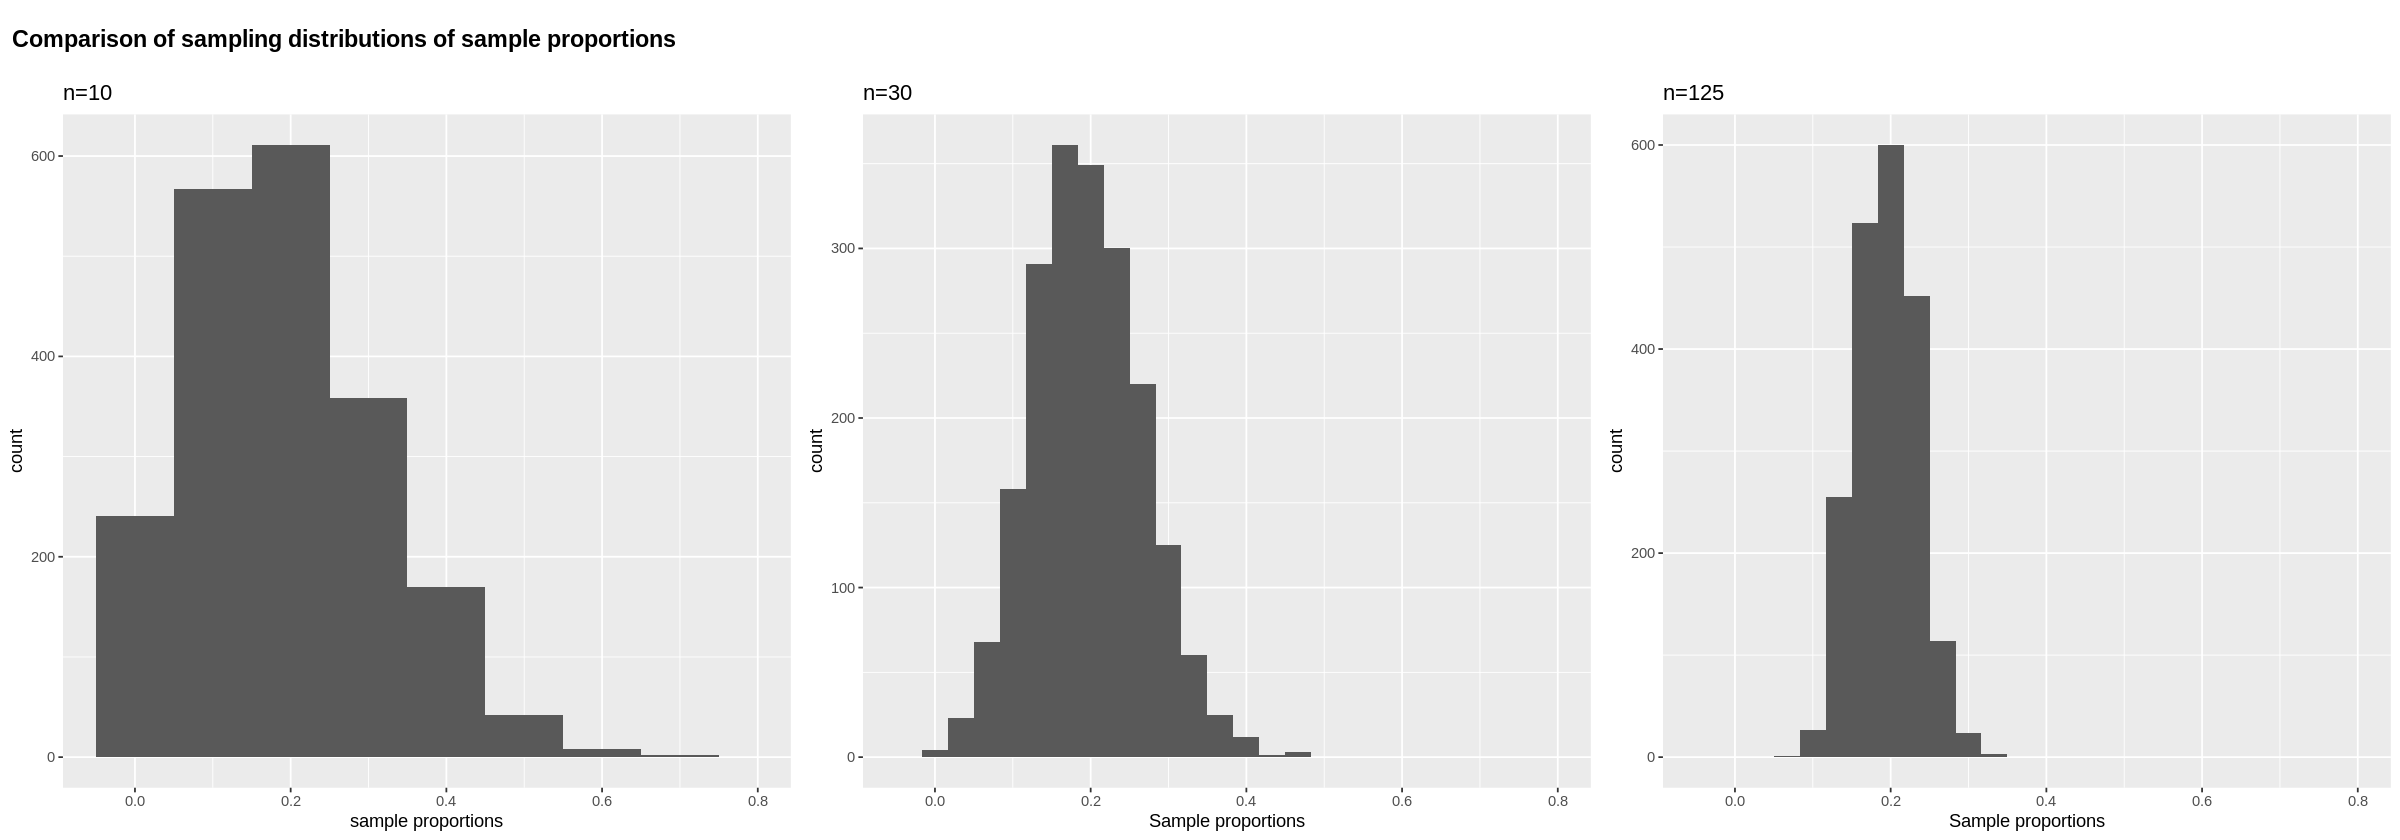

In [111]:
# Run this cell before continuing.
options(repr.plot.width = 20)

proportion_plot_row <- plot_grid(sampling_dist_10 +
                                 scale_x_continuous(limits = c(-0.05, 0.8)),
                                 sampling_dist_30 +
                                 scale_x_continuous(limits = c(-0.05, 0.8)),
                                 sampling_dist_100 +
                                 scale_x_continuous(limits = c(-0.05, 0.8)),
                                 ncol = 3)

title <- ggdraw() + 
  draw_label("Comparison of sampling distributions of sample proportions",
             fontface = 'bold',
             x = 0,
             hjust = 0) +
  theme(plot.margin = margin(0, 0, 0, 7))

means_grid <- plot_grid(title,
                        proportion_plot_row,
                        ncol = 1,
                        rel_heights = c(0.1, 1))

means_grid

**Question 4.10**
<br> {points: 1}

When considering the set of plots above, which statement below **is not** correct:

A. As the sample size increases, the sampling distribution becomes narrower.

B. As the sample size increases, there are more sample point estimates closer to the true population proportion.

C. As the sample size increases, the sampling distribution appears more bell-shaped.

D. As the sample size increases, the standard error of the estimator increases.

_Assign your answer to an object called `answer4.10`. Your answer should be a single character surrounded by quotes._

In [112]:
# answer4.10 <- ...

# your code here
answer4.10 <- "D"

In [113]:
test_4.10()

[1] "Success!"


**Question 4.11**
<br> {points: 1}

True or false?

When considering the set of plots above, sample size has a similar influence on the distribution of sample proportions as it does the distribution of other point estimates.

_Assign your answer to an object called `answer4.11`. Your answer should be either "true" or "false", surrounded by quotes._

In [114]:
# answer4.11 <- ...

# your code here
answer4.11 <- "true"

In [115]:
test_4.11()

[1] "Success!"


## 5. Random and Representative Sampling

Imagine you are at an outdoor Beyoncé concert at the Coachella Valley Music and Arts Festival along with over 125,000 others in attendance, and you are interested in the proportion of the audience that has the entire Beyoncé's discography. Clearly, it would take far too many resources to check whether each audience member has the discography. So how would you answer your question?

This situation, which is analogous to scenarios commonly faced in reality, would force you to estimate the population parameter rather than calculate it directly. As we have learned, one method of doing so is by **sampling**.

![](https://media.giphy.com/media/fxTqfhCjfQC03qBVch/giphy.gif)
<div style="text-align: center"><i>Image from <a href="https://media.giphy.com/media/fxTqfhCjfQC03qBVch/giphy.gif">giphy.com</i></a></div>

So far, we have been using the `rep_sample_n` function to take virtual samples from data that we have acquired for entire populations, which guarantees that our samples are as **random** as possible and gives us a high chance that they are **representative**. However, how do we take a sample in reality when we don't have a function to do it for us?

In the scenario above, suppose you took a sample from the population by asking the 40 people closest to the stage if they have Beyoncé's entire discography. Would this sample be representative of the population? Likely not. Perhaps the individuals near the front are diehard Beyoncé fans and are more likely to have bought the entire discography. This approach may result in an estimate that is much higher than the true parameter. But is the sample random at least? Not necessarily. Perhaps you had to line up early at the entrance to have a chance at being near the front, which means that those who are not diehard Beyoncé's fans and came in later had a significantly less chance of being selected, making the sample biased.

The following questions will focus on your understanding of random and representative sampling and how it can affect your estimations.

**Question 5.0**
<br>{points: 1}

You are interested in determining the proportion of students at UBC that own an iPhone, but you do not have the resources to perform a census. Which sampling method would you expect to be the **least** biased?

A. From a list of all registered UBC students, you randomly select 30 students and ask them if they own an iPhone.

B. You randomly select 30 different people at the Starbucks in the Life Building ask them if they own an iPhone.

C. From a list of all students registered in your STAT 201 lecture, you randomly select 30 students and ask them if they own an iPhone.

D. You stand near an entrance to the West Parkade and randomly select 30 different people entering the parkade and ask them if they own an iPhone.

_Assign your answer to an object called `answer5.0`. Your answer should be a single character surrounded by quotes._

In [116]:
# answer5.0 <- ...

# your code here
answer5.0 <-"A"

In [117]:
test_5.0()

[1] "Success!"


**Question 5.1**
<br>{points: 1}

You are interested in the proportion of UBC students who are satisfied with UBC's responses to COVID-19. To estimate the population parameter, you take a sample from the population by conducting several online polls through UBC's social media platforms, compiling the results, and using them to calculate a point estimate.

True or false?

The sampling method used in the scenario above is an example of random sampling. 

_Assign your answer to an object called `answer5.1`. Your answer should be either "true" or "false", surrounded by quotes._

In [120]:
# answer5.1 <- ...

# your code here
answer5.1 <-"false"

In [121]:
test_5.1()

[1] "Success!"


**Question 5.2**
<br>{points: 1}

You are interested in determining the mean age of all teaching staff at UBC (including professors, lecturers, TAs, etc.). Suppose you randomly choose 50 undergraduate TAs at UBC and calculate the mean of their ages to use as a point estimate. Would you expect the point estimate to be accurate? Why or why not?

A. Your estimate is accurate because your sample size is large enough and the sample is representative of the population.

B. Your estimate is inaccurate. It would likely be too low because of sample bias; your sample is not representative of the population.

C. Your estimate is inaccurate. It would likely be too high because of sample bias; your sample is not representative of the population.

D. Your estimate is inaccurate. There's a high chance it would be either too high or too low because the sample size is quite small.

_Assign your answer to an object called `answer5.2`. Your answer should be a single character surrounded by quotes._

In [124]:
# answer5.2 <- ...

# your code here
answer5.2 <-"B"

In [125]:
test_5.2()

[1] "Success!"


**Question 5.3**
<br>{points: 1}

Suppose you are hired by a fast-food restaurant company to survey its workers about working conditions. You are told that there are 25 restaurants in total, and that there is approximately 1 manager, 6 supervisors, and 34 other workers for each restaurant. You manage to randomly select 200 individuals from all 25 restaurants: 4 managers, 25 supervisors, and 171 workers.

True or false?

Your sample is representative of the population.

_Assign your answer to an object called `answer5.3`. Your answer should be either "true" or "false", surrounded by quotes._

In [126]:
# answer5.3 <- ...

# your code here
answer5.3 <-"true"

In [127]:
test_5.3()

[1] "Success!"
